# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# 3 observations from the data below!



# 1. In the Quartiles, Outliers, and Boxplots section:
# -- By calculating quartiles and outliers for each treatment (Ramicane, Capomulin, Stelasyn, Infubinol), the code allows us to see the variability in tumor volumes within each treatment group. Variability in tumor volume can provide insights into the effectiveness of the different treatments.

# 2. In the Line and Scatter plots section:
# -- The scatter plot shows us that there is some heterogeneity in the data points. Not all mice with the same weight have the exact same average tumor volume. This could be due to tons of individual variables per mouse.

# 3. In the Correlation and Regression section:
# -- The negative correlation indicates a strong negative relationship between mouse weight and average observed tumor volume for mice treated with Capomulin. As mouse weight increases, the average tumor volume tends to decrease. This suggests that there is a relationship between these two variables, with heavier mice generally having smaller average tumor volumes.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata,study_results)


# Display the data table for preview
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/Mouse_metadata.csv'

In [ ]:
# Checking the number of mice.
mouse_count = df['Mouse ID'].unique()
len(mouse_count)

249

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df.duplicated(subset = ['Mouse ID', 'Timepoint'])
df[duplicate_mice].iloc[0]['Mouse ID']

'g989'

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dups = df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)
df[all_dups]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=df[df['Mouse ID']!='g989']
df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Checking the number of mice in the clean DataFrame.
mouse_count = df['Mouse ID'].unique()
len(mouse_count)

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df[['Drug Regimen',	'Tumor Volume (mm3)']].groupby('Drug Regimen').agg([np.mean,np.median,st.variation,np.std,st.tsem])

Tumor Volume (mm3)                                         
                           mean     median variation       std      tsem
Drug Regimen                                                            
Capomulin             40.675741  41.557809  0.122528  4.994774  0.329346
Ceftamin              52.591172  51.776157  0.118852  6.268188  0.469821
Infubinol             52.884795  51.820584  0.123831  6.567243  0.492236
Ketapril              55.235638  53.698743  0.149499  8.279709  0.603860
Naftisol              54.331565  52.509285  0.149320  8.134708  0.596466
Placebo               54.033581  52.288934  0.144343  7.821003  0.581331
Propriva              52.320930  50.446266  0.126138  6.622085  0.544332
Ramicane              40.216745  40.673236  0.120240  4.846308  0.320955
Stelasyn              54.233149  52.431737  0.141778  7.710419  0.573111
Zoniferol             53.236507  51.818479  0.130501  6.966589  0.516398

In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df[['Drug Regimen',	'Tumor Volume (mm3)']].groupby('Drug Regimen').agg([np.mean,np.median,st.variation,np.std,st.tsem])

Tumor Volume (mm3)                                         
                           mean     median variation       std      tsem
Drug Regimen                                                            
Capomulin             40.675741  41.557809  0.122528  4.994774  0.329346
Ceftamin              52.591172  51.776157  0.118852  6.268188  0.469821
Infubinol             52.884795  51.820584  0.123831  6.567243  0.492236
Ketapril              55.235638  53.698743  0.149499  8.279709  0.603860
Naftisol              54.331565  52.509285  0.149320  8.134708  0.596466
Placebo               54.033581  52.288934  0.144343  7.821003  0.581331
Propriva              52.320930  50.446266  0.126138  6.622085  0.544332
Ramicane              40.216745  40.673236  0.120240  4.846308  0.320955
Stelasyn              54.233149  52.431737  0.141778  7.710419  0.573111
Zoniferol             53.236507  51.818479  0.130501  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Count')

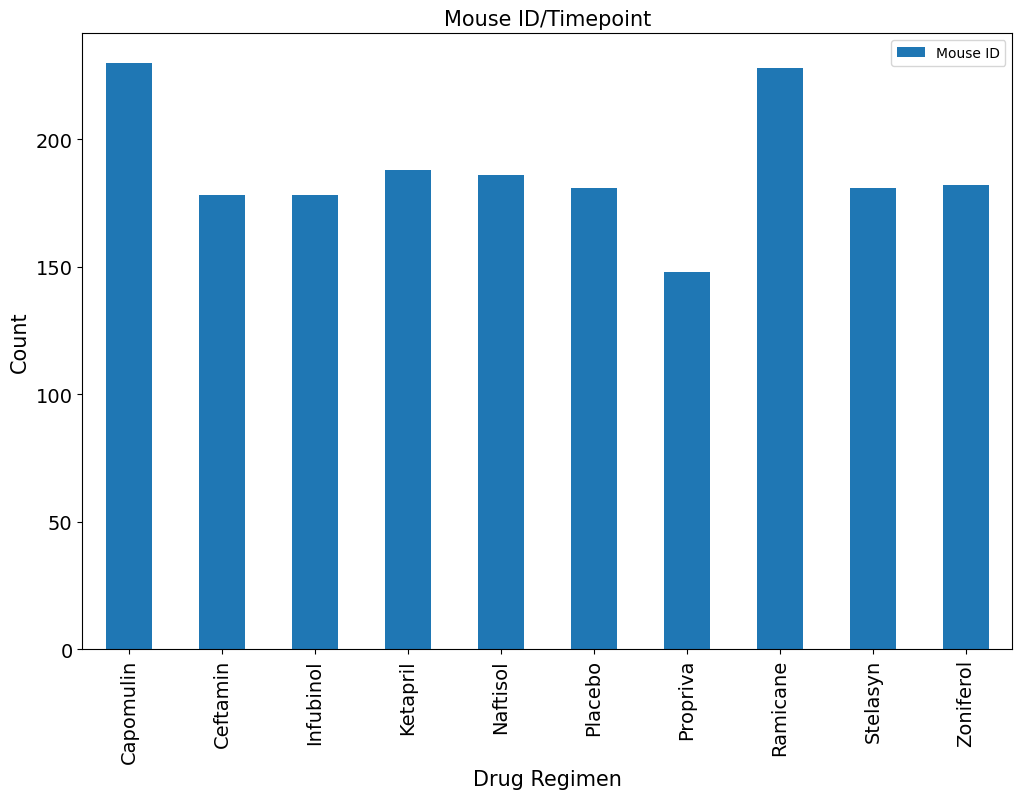

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dr = df.groupby('Drug Regimen').count()
dr.plot(kind='bar',figsize=(12, 8), fontsize=14,y='Mouse ID')
plt.title('Mouse ID/Timepoint',fontsize = 15)
plt.xlabel('Drug Regimen',fontsize = 15)
plt.ylabel('Count',fontsize = 15)

<function matplotlib.pyplot.show(close=None, block=None)>

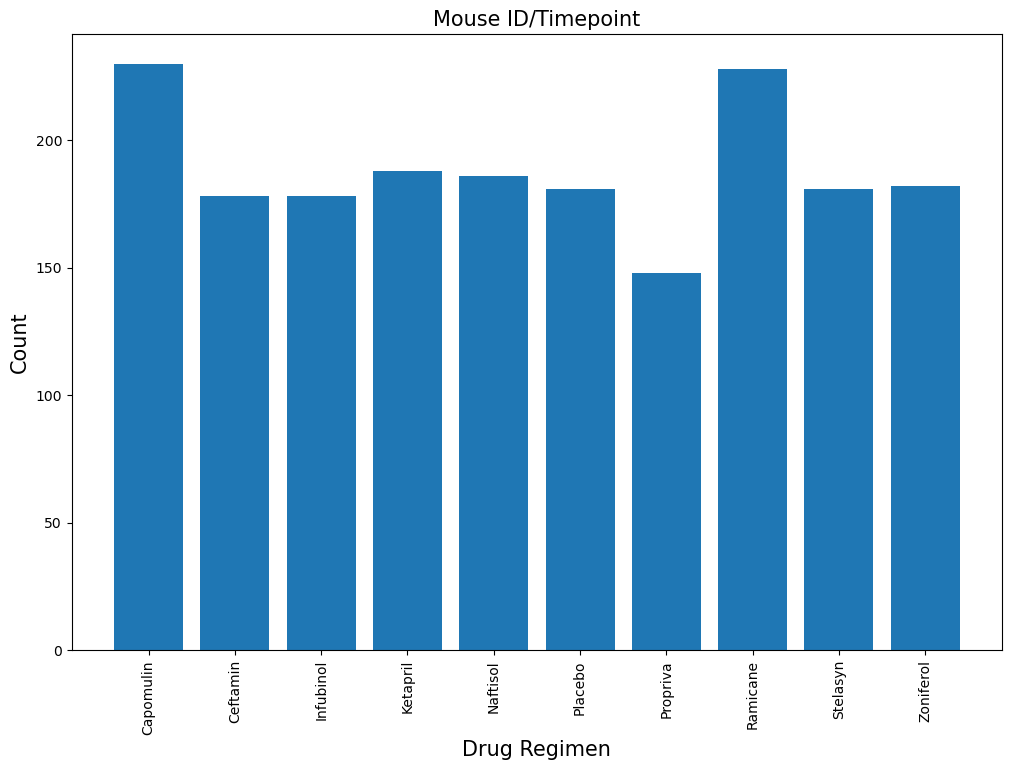

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(12,8))
plt.bar(dr.index, height=dr['Mouse ID'])
plt.xticks(rotation=90)
plt.title('Mouse ID/Timepoint',fontsize = 15)
plt.xlabel('Drug Regimen',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show

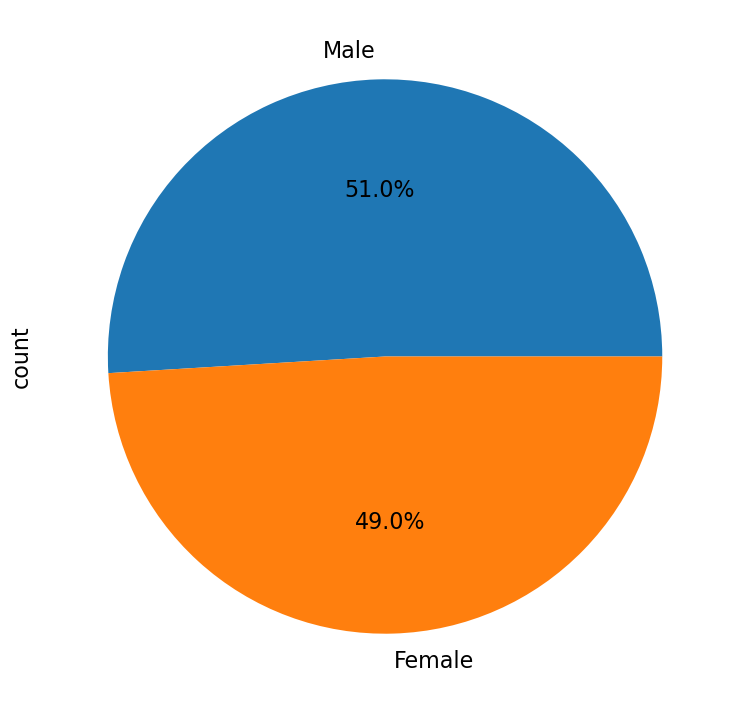

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


pie_chart = df['Sex'].value_counts()
plt.ylabel('Sex', fontsize=16)
pie_chart.plot(kind='pie',autopct='%1.1f%%',figsize=(9, 9),fontsize=16)

plt.show()

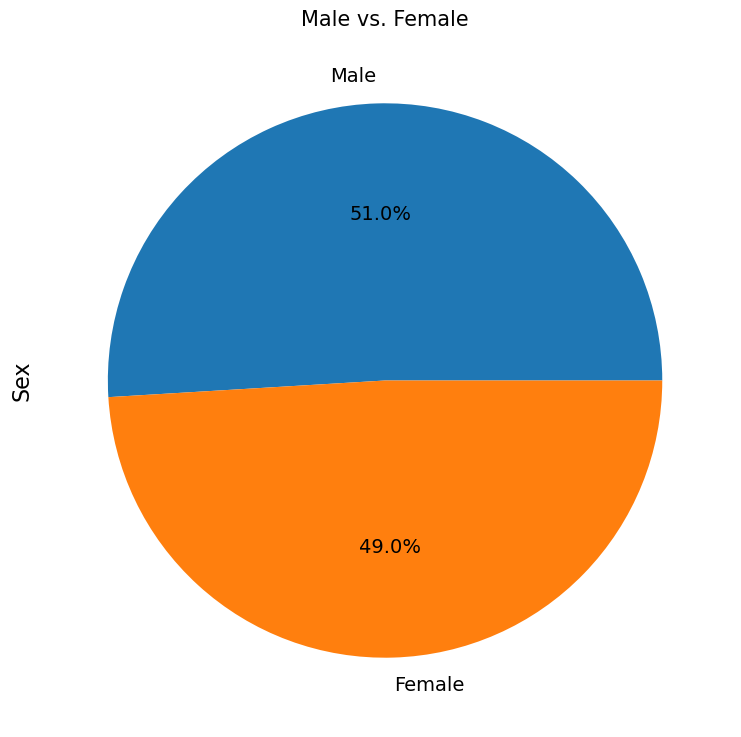

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex = ['Male','Female']
plt.figure(figsize=(9,9))
plt.pie(pie_chart,autopct='%1.1f%%',labels=mouse_sex,textprops={'fontsize': 14})
plt.title('Male vs. Female',fontsize = 15)
plt.ylabel('Sex', fontsize=16)
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint = df.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_data = pd.merge(df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
merged_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Ramicane','Capomulin','Stelasyn','Infubinol']

# Create empty list to fill with tumor vol data (for plotting)
volume = []
for treatment in treatments:
    treatment_data = df[df['Drug Regimen'] == treatment]
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    potential_outliers = treatment_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    volume.append(tumor_volumes)
       

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


<function matplotlib.pyplot.show(close=None, block=None)>

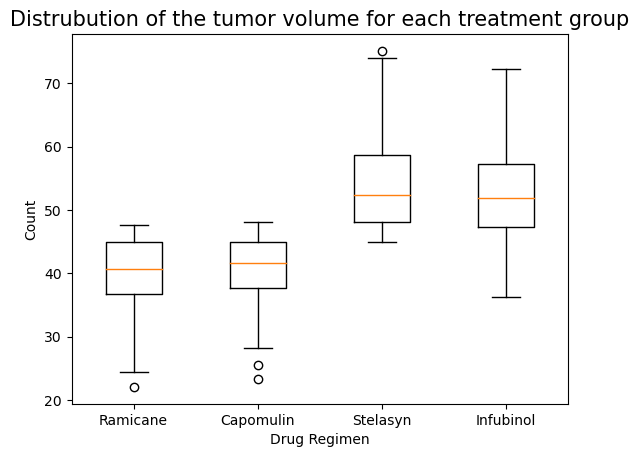

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels = treatments
plt.boxplot(volume,labels=labels)
plt.title('Distrubution of the tumor volume for each treatment group',fontsize = 15)
plt.xlabel('Drug Regimen',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

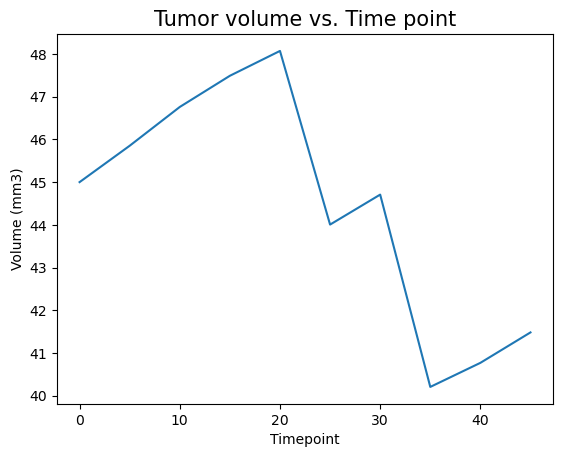

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
capomulin_data = df[(df['Mouse ID']==mouse_id)&(df['Drug Regimen']=='Capomulin')]
plt.plot(capomulin_data['Timepoint'],capomulin_data['Tumor Volume (mm3)'])
plt.title('Tumor volume vs. Time point',fontsize = 15)
plt.xlabel('Timepoint',fontsize = 10)
plt.ylabel('Volume (mm3)',fontsize = 10)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

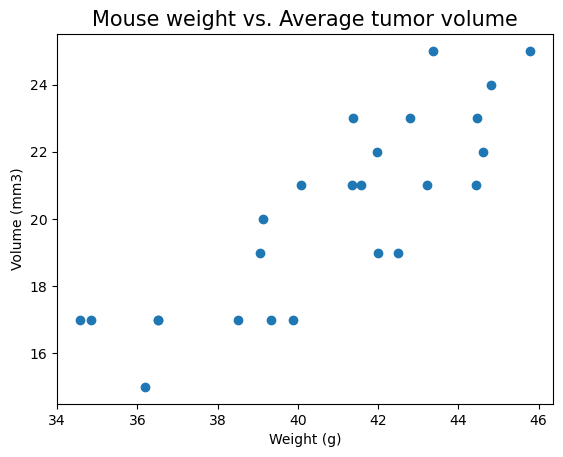

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor = df[df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_mouse_weight = df[df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(capomulin_avg_tumor,capomulin_mouse_weight)
plt.title('Mouse weight vs. Average tumor volume',fontsize = 15)
plt.xlabel('Weight (g)',fontsize = 10)
plt.ylabel('Volume (mm3)',fontsize = 10)
plt.show

## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

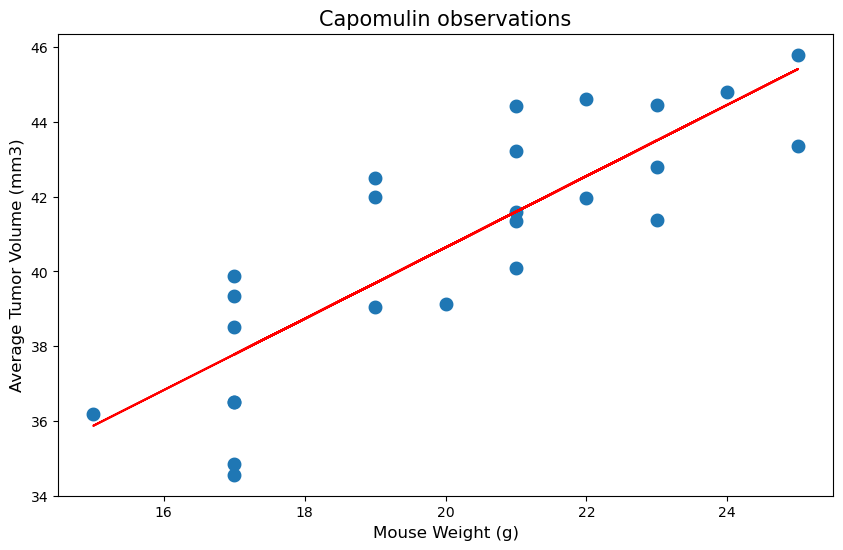

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = capomulin_mouse_weight.corr(capomulin_avg_tumor)
slope, intercept, r_value, p_value, std_err = linregress(capomulin_mouse_weight, capomulin_avg_tumor)

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor, linewidth=4)
plt.xlabel('Mouse Weight (g)', fontsize = 12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 12)
plt.title("Capomulin observations", fontsize= 15)

plt.plot(capomulin_mouse_weight, slope * capomulin_mouse_weight + intercept, color='red')
plt.show